In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.cluster import AgglomerativeClustering

from sklearn.manifold import MDS

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import gridspec

In [2]:
import lib

In [3]:
plt.rcParams["font.family"] = 'DejaVu Serif'

plt.rcParams['text.usetex'] = True

In [4]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

In [5]:
multicolor = False

In [6]:
if multicolor:
    folder_result = 'results'
else:
    folder_result = 'results_gray'

In [7]:
if multicolor:
    color = ['orange', 'green', 'red', 'yelow', 'blue']
else:
    color = ['black', 'black', 'black', 'black', 'black']
marker = ['^', 's', 'v', 'D', 'P']

# Кластеризация

## Example

In [8]:
T = 50
K = 2

data = pd.read_csv('./RealData/2.csv')
X_test = data.values[100:1000, 2:3].reshape([1,-1,1])

List_of_x = np.arange(T, X_test[0].shape[0] - 2*T)

In [9]:
# phase track
phase_track = lib.return_phase_track(X_test, T)

# basis vector
List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c = lib.local_basis(phase_track, T = T)

# pairwise matrix
M_pairwise = lib.get_pairwise_matrix(List_of_basis_vector, List_of_basis_vector_s, List_of_basis_vector_c)

# clustering
model = AgglomerativeClustering(n_clusters=K, affinity='precomputed', linkage='complete')
fitted = model.fit(M_pairwise)
prediction_vector = fitted.fit_predict(M_pairwise)


# 2 dimentions projection
embedding = MDS(n_components=2, dissimilarity='precomputed')
resss = embedding.fit_transform(M_pairwise)

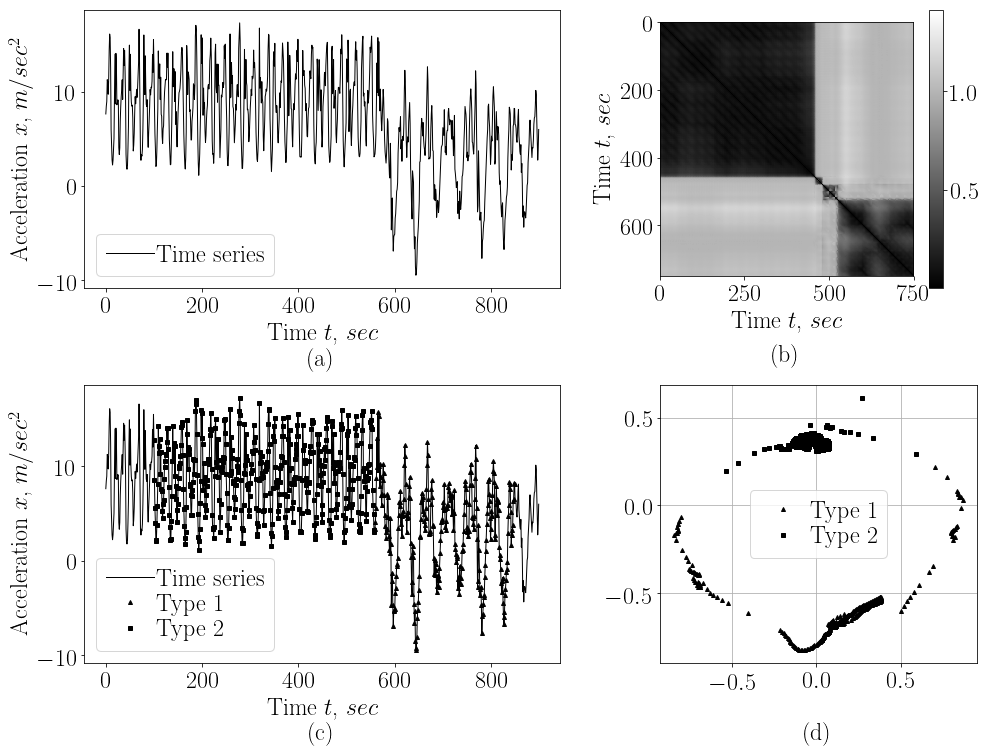

In [10]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################



fig = plt.figure();

gs = gridspec.GridSpec(2, 2, width_ratios=[1.5, 1])

ax1 = fig.add_subplot(gs[0]);
ax2 = fig.add_subplot(gs[1]);
ax3 = fig.add_subplot(gs[2]);
ax4 = fig.add_subplot(gs[3]);

#------___1___------
_ = ax1.plot(X_test[0], '-', color = 'black', label = 'Time series')
ax1.set_title('(a)', y=-0.3)
ax1.set_xlabel('Time $t$, $sec$')
ax1.set_ylabel('Acceleration $x$, $m/sec^2$')
ax1.legend(loc = 'best')

#------___2___------
im = ax2.imshow(M_pairwise, cmap='gray')
fig.colorbar(im, ax=ax2)
ax2.set_title('(b)', y=-0.36)
ax2.set_xlabel('Time $t$, $sec$')
ax2.set_ylabel('Time $t$, $sec$')


#------___3___------
_ = ax3.plot(X_test[0], '-', color = 'black', label = 'Time series')
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = ax3.plot(List_of_x[ind]+T, X_test[0][2*T:X_test[0].shape[0]-T][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))
ax3.legend(loc = 'best')
ax3.set_title('(c)', y=-0.3)
ax3.set_xlabel('Time $t$, $sec$')
ax3.set_ylabel('Acceleration $x$, $m/sec^2$')

#------___4___------
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = ax4.plot(resss[:, 0][ind], resss[:, 1][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))
ax4.grid()
ax4.set_title('(d)', y=-0.3)
ax4.legend(loc = 'best')

plt.subplots_adjust(wspace=0.25, hspace=0.35)

plt.savefig('./' + folder_result + '/experiment_clustering.eps', bbox_inches='tight')
plt.show()

# Поиск начала сегментов

## Example

In [11]:
List_of_All, List_of_point = lib.segmentation(X_test[:, 2*T:X_test[0].shape[0]-T, :], prediction_vector, T)

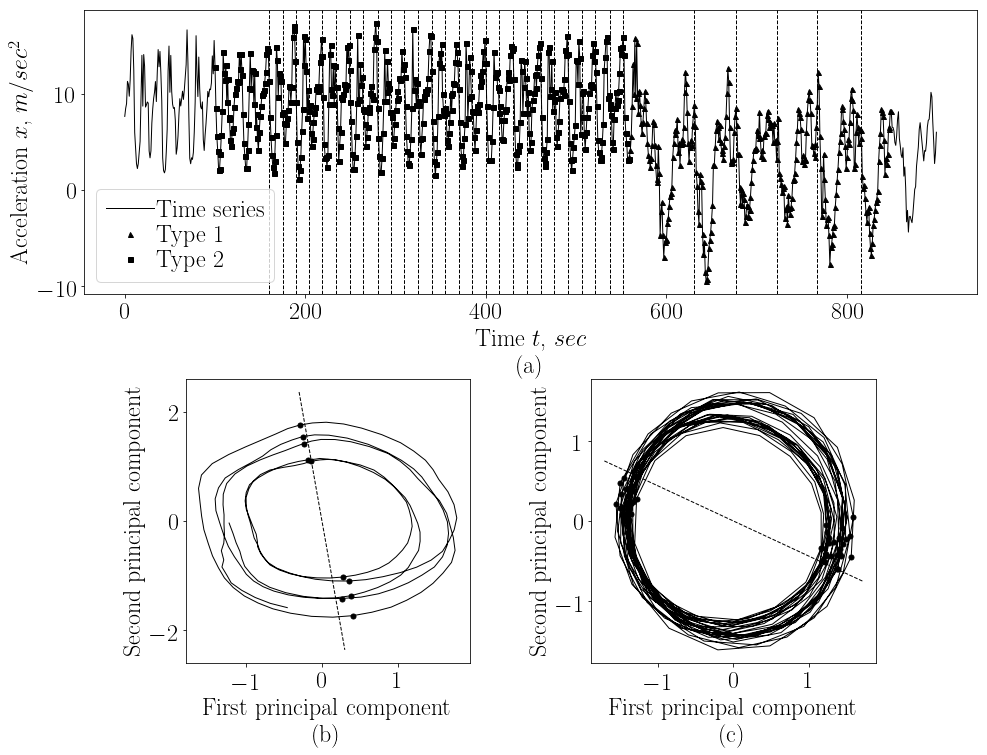

In [12]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

fig = plt.figure();

gs = gridspec.GridSpec(2, 9)

ax1 = fig.add_subplot(gs[0:9]);
ax2 = fig.add_subplot(gs[10:13]);
ax3 = fig.add_subplot(gs[14:17]);


#------___1___------
_ = ax1.plot(X_test[0], '-', color = 'black', label = 'Time series')
for t in np.unique(prediction_vector):
    ind = List_of_point[t] + T
    for x in (List_of_x + T)[ind]:
        _ = ax1.axvline(x = x, linestyle = '--', color = color[t])
for t in np.unique(prediction_vector):
    ind = np.where(prediction_vector == t)
    _ = ax1.plot(List_of_x[ind]+T, X_test[0][2*T:X_test[0].shape[0]-T][ind], linewidth = 0, marker = marker[t], color = color[t], label = 'Type ' + str(t + 1))
ax1.legend(loc = 'best')
ax1.set_title('(a)', y=-0.3)
ax1.set_xlabel('Time $t$, $sec$')
ax1.set_ylabel('Acceleration $x$, $m/sec^2$')

#------___2___------
index = 0
_, _, List_of_points_plus, List_of_points_minus, List_of_t_plus, List_of_t_minus, line_point, ress = List_of_All[index]

_ = ax2.plot(ress[:, 0], ress[:, 1], '-', color = color[index])
for point in List_of_points_plus:
    _ = ax2.plot(point[0], point[1], 'o', color = color[index])
for point in List_of_points_minus:
    _ = ax2.plot(point[0], point[1], 'o', color = color[index])
x_line = np.array([-0.3, 0.3])
k = line_point[1]/line_point[0]
y_line = k*x_line
_ = ax2.plot(x_line, y_line, '--', color = 'black')
ax2.set_title('(b)', y=-0.3)
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')

#------___3___------
index = 1
_, _, List_of_points_plus, List_of_points_minus, List_of_t_plus, List_of_t_minus, line_point, ress = List_of_All[index]

_ = ax3.plot(ress[:, 0], ress[:, 1], '-', color = color[index])
for point in List_of_points_plus:
    _ = ax3.plot(point[0], point[1], 'o', color = color[index])
for point in List_of_points_minus:
    _ = ax3.plot(point[0], point[1], 'o', color = color[index])
x_line = np.array([-1.7, 1.7])
k = line_point[1]/line_point[0]
y_line = k*x_line
_ = ax3.plot(x_line, y_line, '--', color = 'black')
ax3.set_title('(c)', y=-0.3)
ax3.set_xlabel('First principal component')
ax3.set_ylabel('Second principal component')

plt.subplots_adjust(wspace=0.25, hspace=0.3)

plt.savefig('./' + folder_result + '/experiment_segmentation.eps', bbox_inches='tight')
plt.show()



# Картинка во введении

In [13]:
data = pd.read_csv('./SyntheticData/2_patern/1.csv')

# plt.plot(data.values)
# plt.show()

In [14]:
X_intro = (data.values[1150:1600]).reshape([1,-1,1])

# plt.plot(X_intro[0])
# plt.show()

In [15]:
List_of_point = [np.array([15, 54, 95, 135, 175]), np.array([219, 259, 299, 339, 379, 419])]

In [16]:
phase_track_intro = lib.return_phase_track(X_intro[:, 0:100, :], 20)
model = PCA(n_components=2)
basis_a = model.fit(phase_track_intro).components_
res_a = model.transform(phase_track_intro)

phase_track_intro = lib.return_phase_track(X_intro[:, 300:400, :], 20)
model = PCA(n_components=2)
basis_b = model.fit(phase_track_intro).components_
res_b = model.transform(phase_track_intro)

In [17]:
alpha_1 = (basis_a[0]*basis_b[0]).sum()
alpha_2 = (basis_a[1]*basis_b[0]).sum()

beta_1 = (basis_a[0]*basis_b[1]).sum()
beta_2 = (basis_a[1]*basis_b[1]).sum()

a_1 = np.array([1, 0, 0])
a_2 = np.array([0, 1, 0])

b_1 = np.array([alpha_1, alpha_2, np.sqrt(1- alpha_1**2- alpha_2**2)])
b_1 = b_1/np.sqrt((b_1**2).sum())
b_2 = np.array([beta_1, beta_2, (-alpha_1*beta_1-alpha_2*beta_2)/np.sqrt(1- alpha_1**2- alpha_2**2)])
b_2 = b_2/np.sqrt((b_2**2).sum())

In [18]:
normal_1 = np.array([0,0,1])
normal_2 = np.cross(b_1, b_2)

point  = np.array([1, 1, 1])

In [19]:
ress_a = res_a[:,0].reshape([-1,1])*a_1.reshape([1,-1]) + res_a[:,1].reshape([-1,1])*a_2.reshape([1,-1])

ress_b = res_b[:,0].reshape([-1,1])*b_1.reshape([1,-1]) + res_b[:,1].reshape([-1,1])*b_2.reshape([1,-1])

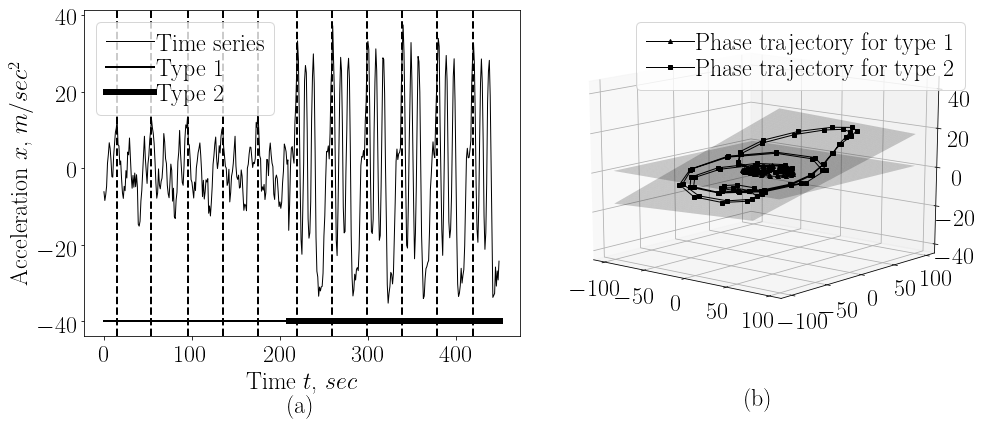

In [20]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16.0, 6.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

fig = plt.figure();

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0]);
ax2 = fig.add_subplot(gs[1], projection='3d');

#------___1___------
_ = ax1.plot(X_intro[0], '-', color = 'black', label = 'Time series')

list_ = [-40, -40]
_ = ax1.plot([0, 210], list_, linewidth = 2, color = color[0], label = "Type 1")
_ = ax1.plot([210, 450], list_, linewidth = 6, color = color[1], label = "Type 2")
for t in [0, 1]:
    for x in List_of_point[t]:
        _ = ax1.axvline(x = x, linewidth = 2, linestyle = '--', color = color[t])
ax1.legend(loc = 'best')
ax1.set_xlabel('Time $t$, $sec$')
ax1.set_ylabel('Acceleration $x$, $m/sec^2$')
ax1.set_title('(a)', y=-0.25)

#------___2___------
xx, yy = np.meshgrid(range(-100, 100), range(-100, 100))
z_1 = (-normal_1[0] * xx - normal_1[1] * yy + point.dot(normal_1)) * 1./normal_1[2]
ax2.plot_surface(xx, yy, z_1, alpha = 0.2,  color = color[0])
ax2.plot(ress_a[:,0] , ress_a[:,1] , ress_a[:,2], "-", marker = marker[0],  color=color[0], label = 'Phase trajectory for type 1')
z_2 = (-normal_2[0] * xx - normal_2[1] * yy +point.dot(normal_2)) * 1./normal_2[2]
ax2.plot_surface(xx, yy, z_2, alpha = 0.2,  color = color[1])
ax2.plot(ress_b[:, 0] , ress_b[:, 1] , ress_b[:, 2], "-", marker = marker[1],  color=color[1], label = 'Phase trajectory for type 2')
ax2.view_init(15, -50)
ax2.legend(loc = 'best')
ax2.xaxis.set_ticks(np.arange(-100, 101, 50))
ax2.yaxis.set_ticks(np.arange(-100, 101, 50))
ax2.zaxis.set_ticks(np.arange(-40, 41, 20))
ax2.set_title('(b)', y=-0.25)

plt.subplots_adjust(wspace=0.05, hspace=0.2)

plt.savefig('./' + folder_result + '/introduction.eps', bbox_inches='tight')
plt.show()

# Картинка в постановке

In [21]:
data = pd.read_csv('./SyntheticData/2_patern/1.csv')

# plt.plot(data.values)
# plt.show()

In [22]:
X_intro = (data.values[1150:1300]).reshape([1,-1,1])

# plt.plot(X_intro[0])
# plt.show()

In [23]:
List_of_point = [np.array([15, 54, 95, 135])]

In [24]:
phase_track_intro = lib.return_phase_track(X_intro[:, :, :], 40)
model = PCA(n_components=2)
basis_vv = model.fit(phase_track_intro).components_
res_vv = model.transform(phase_track_intro)

In [25]:
# res_vv.shape

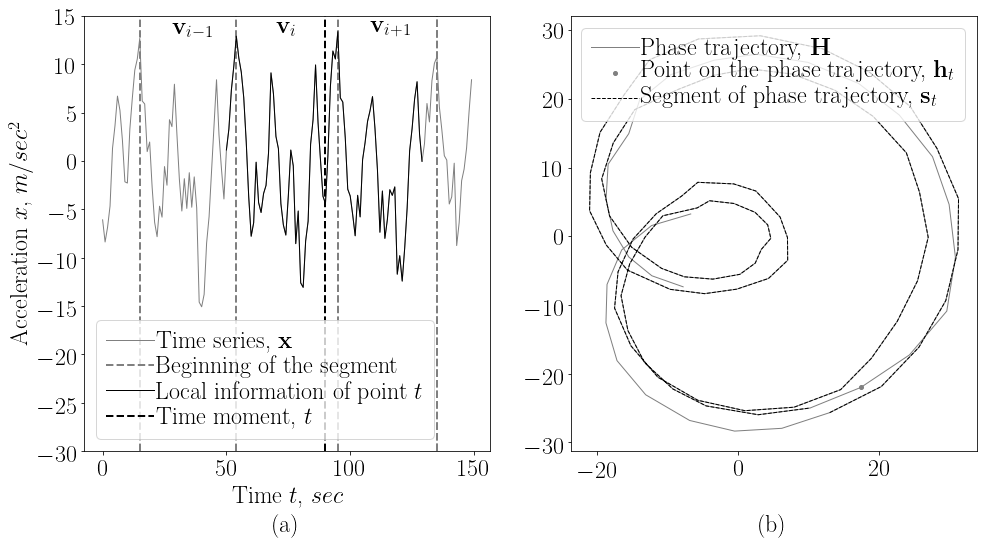

In [26]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (16.0, 8.0)
plt.rcParams['font.size'] = Text_size
plt.rcParams["legend.labelspacing"] = 0.1
plt.rcParams["legend.handletextpad"] = 0.1
#################################################

fig = plt.figure();

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0]);
ax2 = fig.add_subplot(gs[1]);

#------___1___------
_ = ax1.plot(X_intro[0], '-', color = 'gray', label = 'Time series, $\mathbf{x}$')
for t in [0]:
    for x in List_of_point[t]:
        _ = ax1.axvline(x = x, linewidth = 2, linestyle = '--', color = 'gray')
_ = ax1.axvline(x = x, linewidth = 2, linestyle = '--', color = 'gray', label = "Beginning of the segment")
t = 90
xxx = np.arange(t - 40, t + 40, 1)
ax1.plot(xxx, X_intro[0][xxx], '-', color = 'black', label = 'Local information of point $t$')
_ = ax1.axvline(x = t, linewidth = 2, linestyle = '--', color = 'black', label = "Time moment, $t$")
ax1.set_ylim((-30,15))
ax1.text (108, 13, "$\mathbf{v}_{i+1}$")
ax1.text (70, 13, "$\mathbf{v}_{i}$")
ax1.text (28, 13, "$\mathbf{v}_{i-1}$")
ax1.legend(loc = 'best')
ax1.set_xlabel('Time $t$, $sec$')
ax1.set_ylabel('Acceleration $x$, $m/sec^2$')
ax1.set_title('(a)', y=-0.2)

#------___2___------
_ = ax2.plot(res_vv[:, 0], res_vv[:, 1], '-', color = 'gray', label = 'Phase trajectory, $\mathbf{H}$')
_ = ax2.plot(res_vv[t, 0], res_vv[t, 1], 'o', color = 'gray', label = 'Point on the phase trajectory, $\mathbf{h}_t$')
xxx = np.arange(t - 40 - 40, t - 40 + 40, 1)
_ = ax2.plot(res_vv[xxx, 0], res_vv[xxx, 1], '--', color = 'black', label  = 'Segment of phase trajectory, $\mathbf{s}_t$')
ax2.legend(loc = 'best')
ax2.set_title('(b)', y=-0.2)

plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.savefig('./' + folder_result + '/statement.eps', bbox_inches='tight')
plt.show()